In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Numpy Interpolation

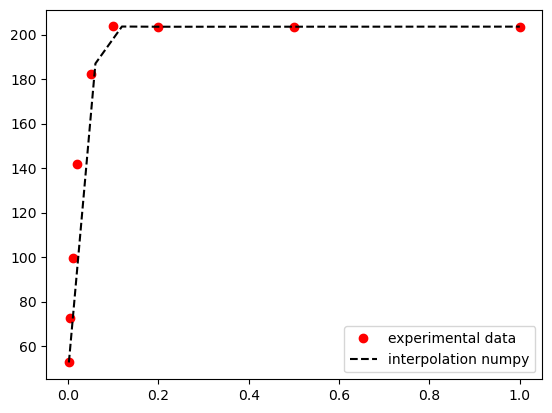

In [2]:
x = np.array([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
y = np.array([52.64, 72.59, 99.67, 141.79, 182.48, 203.68, 203.56, 203.58, 203.61])

# define x values for interpolation
x_interp1 = np.linspace(x[0], x[-1], int(len(x)*2))

# interpolate the y-values
y_interp1 = np.interp(x_interp1, x, y)

plt.plot(x, y, 'ro', label = 'experimental data')
plt.plot(x_interp1, y_interp1, 'k--', label = 'interpolation numpy')
plt.legend()

# Scipy Interpolation

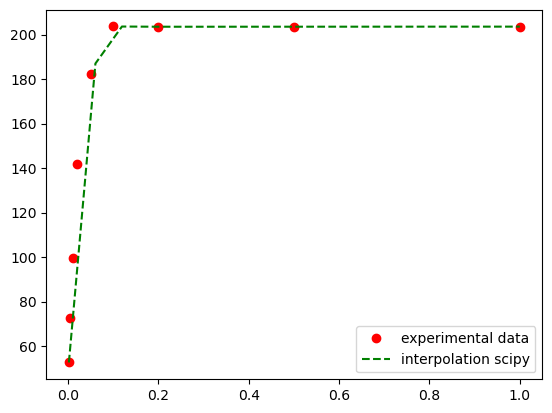

In [3]:
x = np.array([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
y = np.array([52.64, 72.59, 99.67, 141.79, 182.48, 203.68, 203.56, 203.58, 203.61])

# define x values for interpolation
x_interp2 = np.linspace(x[0], x[-1], int(len(x)*2))

# interpolate the y-values
f = interpolate.interp1d(x, y) # 1st create the function for interpolation
y_interp2 = f(x_interp2)

plt.plot(x, y, 'ro', label = 'experimental data')
plt.plot(x_interp2, y_interp2, 'g--', label = 'interpolation scipy')
plt.legend()

# Interpolation from scratch

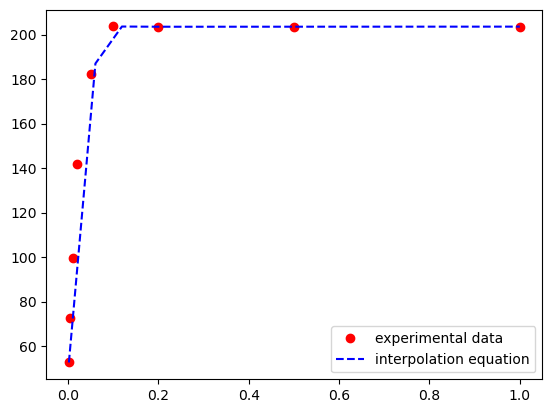

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1])
y = np.array([52.64, 72.59, 99.67, 141.79, 182.48, 203.68, 203.56, 203.58, 203.61])

# Define the interpolation function
def linear_interpolation(x, x_data, y_data):
    # Find the two closest data points in x_data to x
    idx = np.searchsorted(x_data, x)
    
    # Ensure idx is within bounds
    if idx == 0:
        """There's no data point to the left of x to use for interpolation.
        To handle this, we set idx to 1 so that we use the first two data points for interpolation.
        """
        idx = 1
    elif idx == len(x_data):
        """
        here's no data point to the right of x to use for interpolation. 
        To handle this, we set idx to len(x_data) - 1 so that we use the last two data points for interpolation.
        """
        idx = len(x_data) - 1

    # Calculate the slope (m) and y-intercept (b) for the line between the two closest points
    x1, x2 = x_data[idx - 1], x_data[idx]
    y1, y2 = y_data[idx - 1], y_data[idx]
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m * x1

    # Use the equation of the line to interpolate the value at x
    y_interp = m * x + b
    
    return y_interp

# Define the x values for interpolation
x_interp2 = np.linspace(x[0], x[-1], int(len(x)*2))

# Interpolate the y values using the custom linear_interpolation function
y_interp2 = np.array([linear_interpolation(xi, x, y) for xi in x_interp2])

plt.plot(x, y, 'ro', label = 'experimental data')
plt.plot(x_interp2, y_interp2, 'b--', label = 'interpolation equation')
plt.legend()